In [4]:
from cpmpy import *
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

def findRels(arl,n=0):
  """ find all congruence relations of an optiongraph
  arl is a list of arrows
  vertices computed from arl unless n>0
  if n>0 vertex then list is range(n)
  """
  if n==0:
    V=list({p for ar in arl for p in ar})
  else:
     V=list(range(n))
  Opt={p:{y for x,y in arl if p==x} for p in V}
  k=len(V)
    
  mdl=Model()
  # class number
  cl={p:intvar(1,k) for p in V}
    
  # constraints
  mdl+=cl[V[0]]==1
  for i in range(1,len(V)):
    mdl+= cl[V[i]] <= 1+max([cl[V[j]] for j in range(i)])

  for p1 in V:
    for p2 in V:
      if p1<p2:
        for q1 in Opt[p1]:
          mdl+= (cl[p1]==cl[p2]).implies(any([cl[q1]==cl[q2] for q2 in Opt[p2]]))
        for q2 in Opt[p2]:
          mdl+= (cl[p1]==cl[p2]).implies(any([cl[q2]==cl[q1] for q1 in Opt[p1]]))

  # print(mdl)
  sols=[]

  def pr_sol():
    result={p:cl[p].value() for p in V}
    sols.append(result)
    
  mdl.solveAll(display=pr_sol)
  return sols

def larger(sols,i,j):
   """ compare two congruence relations """
   sol1=sols[i]
   sol2=sols[j]
   for k in sol1:
      for l in sol1:
         if (sol2[k]==sol2[l]) and sol1[k]!=sol1[l]:
            return False
   return True

def draw_hasse_diagram(sols):
    """ print the Hasse diagram of the lattice of congruence relations """
    poset=list(range(len(sols)))
    G=nx.DiGraph()
    G.add_nodes_from(poset)
    for i in poset:
        for j in poset:
            if i!=j and larger(sols,i,j) and not any(larger(sols,i,k) and larger (sols,k,j) for k in poset if (i!=k) and (k!=j)):
                G.add_edge(i,j)
    pos=nx.spring_layout(G)
    pos=graphviz_layout(G,prog='dot')
    plt.figure(figsize=[1.5,1.5])
    nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue')
    plt.show()

def print_sol(sol):
  """ print congruence relation as nontrivial classes """
  print('|',end='')
  kul=sorted(sol.keys())
  for a in set(sol.values()):
    vs=[v for v in kul if sol[v]==a]
    if len(vs)>1:
      print(*vs,end='|')
  print() 

def draw_q(sol,arl):
  """ draw a quotient optiongraph """
  arlq=sorted(list({(sol[p],sol[q]) for (p,q) in arl}))
  plt.figure(figsize=[1.3,1.3])
  Dq=nx.DiGraph()
  Dq.add_edges_from(arlq)
  # pos=nx.circular_layout(Dq)
  # pos=nx.spring_layout(Dq,iterations=10000)
  pos=graphviz_layout(Dq,prog='neato')
  nx.draw(Dq,pos,with_labels=True, arrows=True)
  plt.show()

def analyze(arl):
  """ analyze an optiongraph given with a list of arrows """
  sols=findRels(arl)
  plt.figure(figsize=[2.1,2.1])
  D=nx.DiGraph()
  D.add_edges_from(arl)
  # pos=nx.circular_layout(D)
  # pos=nx.spring_layout(D,iterations=10000)
  pos=graphviz_layout(D,prog='neato')
  nx.draw(D,pos,with_labels=True, arrows=True,node_color='lightgreen')
  plt.show()
  draw_hasse_diagram(sols)
  for i,sol in enumerate(sols):
    print(i,':',end='  ')
    print_sol(sol)
  return sols

Figure 1

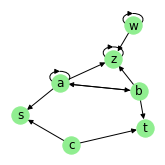

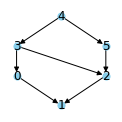

0 :  |w z|
1 :  |
2 :  |s t|
3 :  |w z|s t|
4 :  |a b|w z|s t|
5 :  |a b|s t|


In [5]:
arl=[('a','b'),('a','s'),('b','t'),('a','a'),('b','a'),('a','z'),('b','z'),('z','z'),('w','z'),('w','w'),('c','s'),('c','t')]
sols=analyze(arl)

Figure 7

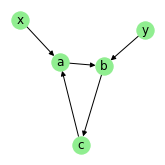

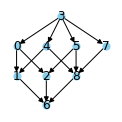

0 :  |a y|c x|
1 :  |a y|
2 :  |c x|
3 :  |a b c x y|
4 :  |a b c y|
5 :  |a b c x|
6 :  |
7 :  |a b c|x y|
8 :  |a b c|


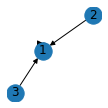

In [6]:
arl=[('a','b'),('b','c'),('c','a'),('x','a'),('y','b')]
sols=analyze(arl)
draw_q(sols[8],arl)